Case Study #05 - ANOVA by Jayaram K

XYZ Company has offices in four different zones. The company wishes to investigate the following :

    ●  The mean sales generated by each zone.
    ●  Total sales generated by all the zones for each month.
    ●  Check whether all the zones generate the same amount of sales.
Help the company to carry out their study with the help of data provided.

In [1]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read the data to Python environment

In [38]:
data = pd.read_csv('Sales_data_zone_wise.csv')

Explain the dataset

In [39]:
# Displaying first 5 rows

In [40]:
data.head(5)

,Month,Zone - A,Zone - B,Zone - C,Zone - D
0,Month - 1,1483525,1748451,1523308,2267260
1,Month - 2,1238428,1707421,2212113,1994341
2,Month - 3,1860771,2091194,1282374,1241600
3,Month - 4,1871571,1759617,2290580,2252681
4,Month - 5,1244922,1606010,1818334,1326062


- The data set containing 5 columns of sales data for 4 different zones throughout the months.

In [41]:
# Renaming the columns for easy access

In [42]:
data.columns = ['Month','Zone-A','Zone-B','Zone-C','Zone-D']

In [47]:
data.shape

(29, 5)

- Data set containing 5 columns and 29 rows.

In [54]:
data['Month'].unique().shape[0]

29

In [55]:
# Month column contains 29 unique values which is equal to data set column size. 
# So, changing the column Month into index, since it contains only the unique month names.

In [56]:
data = data.set_index('Month')

In [57]:
data.head(5)

,Zone-A,Zone-B,Zone-C,Zone-D
Month,,,,
Month - 1,1483525,1748451,1523308,2267260
Month - 2,1238428,1707421,2212113,1994341
Month - 3,1860771,2091194,1282374,1241600
Month - 4,1871571,1759617,2290580,2252681
Month - 5,1244922,1606010,1818334,1326062


In [58]:
# Getting concise summary of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29 entries, Month - 1 to Month - 29
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Zone-A  29 non-null     int64
 1   Zone-B  29 non-null     int64
 2   Zone-C  29 non-null     int64
 3   Zone-D  29 non-null     int64
dtypes: int64(4)
memory usage: 1.1+ KB


In [12]:
# Checking for Null values in the data

In [13]:
data.isnull().sum()

Zone-A    0
Zone-B    0
Zone-C    0
Zone-D    0
dtype: int64

- No null values present in the data.

In [14]:
# Displaying the statistical summary of the dataset.

In [15]:
np.round(data.describe(),decimals=2) # The values rounded to 2 decimal places

,Zone-A,Zone-B,Zone-C,Zone-D
count,29.00,29.00,29.00,29.00
mean,1540493.14,1755559.59,1772871.03,1842926.76
std,261940.06,168389.89,333193.72,375016.48
min,1128185.00,1527574.00,1237722.00,1234311.00
25%,1305972.00,1606010.00,1523308.00,1520406.00
50%,1534390.00,1740365.00,1767047.00,1854412.00
75%,1820196.00,1875658.00,2098463.00,2180416.00
max,2004480.00,2091194.00,2290580.00,2364132.00


- From the above table we can find the Total count, Mean, Standard Deviation, Min & Max value and percentile of each column(zones).

# 1. The mean sales generated by each zone.

There are four zones named, Zone-A, Zone-B, Zone-C, and Zone-D.

In [16]:
# Calculating the mean sales and displaying it in a table 
avg_sales = np.mean(data[['Zone-A','Zone-B','Zone-C','Zone-D']]).rename_axis('Zones').reset_index(name='Avg Sales')
print('Average sales generated by each Zone:')
avg_sales.style.format(precision=2).hide_index()

Average sales generated by each Zone:


Zones,Avg Sales
Zone-A,1540493.14
Zone-B,1755559.59
Zone-C,1772871.03
Zone-D,1842926.76


In [17]:
# Plotting a line graph for the same

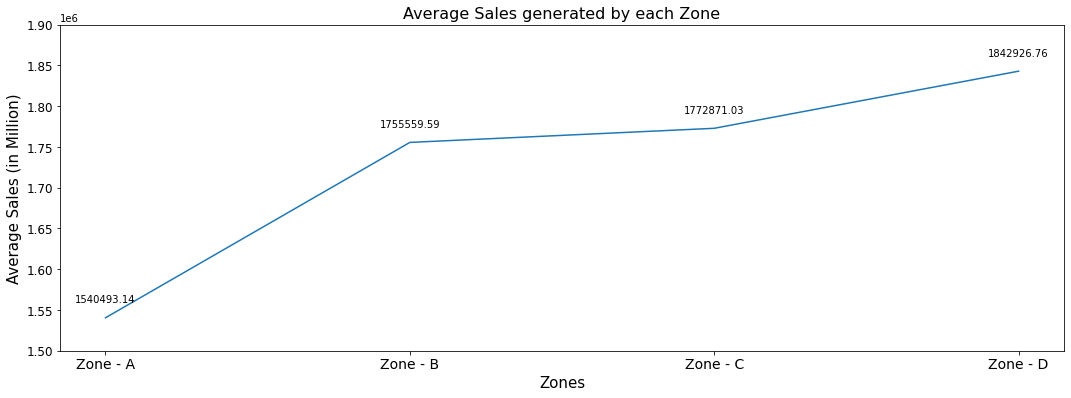

In [18]:
plt.figure(figsize=(18,6))
plt.plot(avg_sales['Avg Sales'])
plt.title("Average Sales generated by each Zone",fontsize = 16)
plt.xlabel('Zones',fontsize = 15)
plt.ylabel('Average Sales (in Million)',fontsize = 15)
plt.xticks([0,1,2,3,],["Zone - A","Zone - B",'Zone - C','Zone - D'],fontsize = 14)
plt.yticks(fontsize = 12)

plt.ylim((1500000,1900000))

for x,y in enumerate(avg_sales['Avg Sales']):
    label = "{:.2f}".format(y)
    plt.annotate(label, (x,y), textcoords="offset points", xytext=(0,15), ha='center') 
    
plt.show()

- We can see that Zone-D generating the highest Sales and Zone-A generating the least Sales.
- The average sales generated by each zone is different. 

# 2.Total sales generated by all the zones for each month.

There are four zones and to find the total sales generated by all the zones for each month, we calculate the total sum of each row.

In [19]:
# Calculating the total sum of sales for each month and displaying it in a table 
total_sales = data.sum(axis=1).rename_axis('Month').reset_index(name='Sales')
total_sales.style.hide_index()

Month,Sales
Month - 1,7022544
Month - 2,7152303
Month - 3,6475939
Month - 4,8174449
Month - 5,5995328
Month - 6,7151387
Month - 7,7287108
Month - 8,7816299
Month - 9,6703395
Month - 10,7128210


In [20]:
# Plotting a line graph for the same

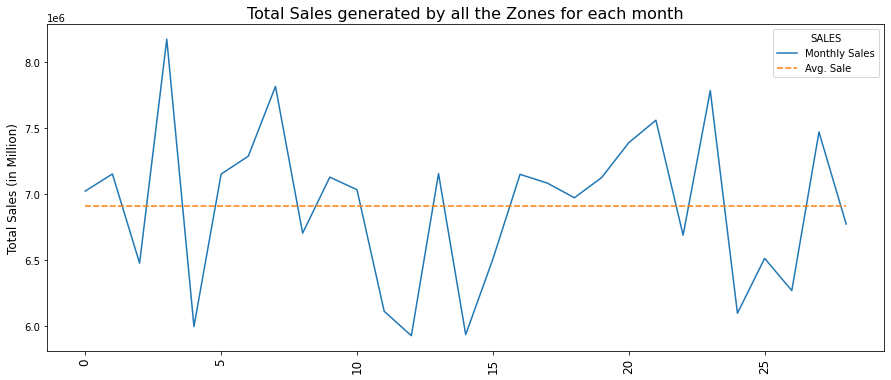

In [59]:
plt.figure(figsize=(15,6))

total_sales['avg'] = total_sales['Sales'].mean() # To draw 'Avgerage' line

sns.lineplot(data = total_sales)

plt.title("Total Sales generated by all the Zones for each month",fontsize = 16)
plt.ylabel('Total Sales (in Million)',fontsize = 12)
plt.xticks(rotation = 90,fontsize = 12)

plt.legend(title='SALES',  labels=['Monthly Sales', 'Avg. Sale'])

plt.show()

- We can see that the 'Month - 4' generated the highest Sales and 'Month - 13' the minimum.
- There is huge variation in the total sales generated by all the zones for each month. 

# 3.Check whether all the zones generate the same amount of sales.

We can use the ANOVA method to check the variability of average sales among zones.

ANOVA help us to understand how different groups respond, with a null hypothesis for the test that the means of the different groups are equal. Here the different groups are the 4 Zones. We can see that, there is only independent variables to evaluate, and therefore, one-way ANOVA method is suitable for analysis.

Here we use One-way ANOVA F-test to analyse the difference in means between groups(zones).

- One-Way Analysis of Variance (ANOVA) tells you if there are any statistical differences between the means of three or more independent groups.

In [22]:
# Importing the necessary library to conduct one-way f-test
import scipy
from scipy.stats import f_oneway

In [23]:
# Defining our Hypothesis for testing

- Null Hypothesis  H<sub>0</sub> : μ1 = μ2 = μ3 = μ4, that means, all the means of different groups are equal
- Alternative Hypothesis H<sub>a</sub> : at least one population mean is different from the rest

In [ ]:
# Set the alpha value or the Level of significance

In [25]:
alpha = .05

In [26]:
Zone_A = np.array(data['Zone-A'])
Zone_B = np.array(data['Zone-B'])
Zone_C = np.array(data['Zone-C'])
Zone_D = np.array(data['Zone-D'])

In [27]:
# Calculating f-statistic and p-value

In [28]:
F_stat, p_value = f_oneway(Zone_A,Zone_B,Zone_C,Zone_D)
print('F-Statistics',"%.3f"% F_stat)
print('P-Value',"%.3f"% p_value)

F-Statistics 5.672
P-Value 0.001


In [29]:
# Comparing the P-Value with our alpha value to test the significance of null hypothesis

In [62]:
if p_value <= alpha:
    print('Reject null hypothesis, that means, all the zones generate different amount of sales')
else:
    print('Accept null hypothesis, that means, all the zones generate the same amount of sales')

Reject null hypothesis, that means, all the zones generate different amount of sales


The F test statistic is 5.672 and the corresponding P-value is 0.001. Since the P-value is less than .05(Level of significance), we reject the null hypothesis.

- This means that the average sale amounts generated by the Zones [Zone A, Zone B, Zone C, and Zone D] are different.

Limitations of the ANOVA:

- Whilst ANOVA will help us to analyse the difference in means between two or more independent variables, but it won’t tell us which statistical groups were different from each other.
- If our test returns a significant f-statistic, we may need to run an ad hoc test (like the Least Significant Difference test or Tukey’s Test) to understand exactly which groups had a difference in means.

Thank You.